<a href="https://colab.research.google.com/github/ArjuArch/ML-Supervised-Learning/blob/main/Demand_Forecasting_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("/content/drive/MyDrive/DataSet/product_sales.csv")

In [19]:
display(df.head())
display(df.tail())

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12
150149,212644,09/07/13,9984,679023,234.4125,234.4125,0,0,15


In [20]:
df.shape

(150150, 9)

In [4]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [26]:
timeline=df["week"].str.split("/",n=3,expand=True)
df["date"]=timeline[0].astype('int')
df["month"]=timeline[1].astype('int')
df["year"]=(timeline[2].astype('int'))+2000
display(df.head())

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,1,2011
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,1,2011
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,1,2011
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,1,2011
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,1,2011


In [34]:
df_year_wise_sorted=df.sort_values(by="year",ascending=False)
print(df_year_wise_sorted["year"].head())
print(df_year_wise_sorted["year"].tail())

117810    2013
117811    2013
117812    2013
117813    2013
150102    2013
Name: year, dtype: int64
13    2011
12    2011
11    2011
10    2011
9     2011
Name: year, dtype: int64


In [42]:
df_date_wise_sorted=df.sort_values(by="date",ascending=False)
print(df_date_wise_sorted["date"].head())
print(df_date_wise_sorted["date"].tail())

2751    31
2720    31
2721    31
2722    31
2691    31
Name: date, dtype: int64
77410    1
77409    1
77393    1
77385    1
77401    1
Name: date, dtype: int64


In [44]:
#Count any rows exeeding the range 1 to 31 in the date field
count=df[(df["date"]<1) | (df["date"]>31)].shape[0]
print(count)

0


In [45]:
from datetime import datetime
def weekend_or_weekday(year,month,day):
  d=datetime(year,month,day)
  return 1 if d.weekday()>4 else 0
df["weekend"]=df.apply(lambda x:weekend_or_weekday(x["year"],x["month"],x["date"]),axis=1)

In [49]:
import holidays
india_holidays=holidays.country_holidays("IN")
df["holidays"]=df["date"].apply(lambda x:1 if india_holidays.get(x) else 0)

/usr/local/lib/python3.11/dist-packages/holidays/countries/india.py:180: Warning: Requested Holidays are available only from 2001 to 2035.
  warnings.warn(warning_msg, Warning)


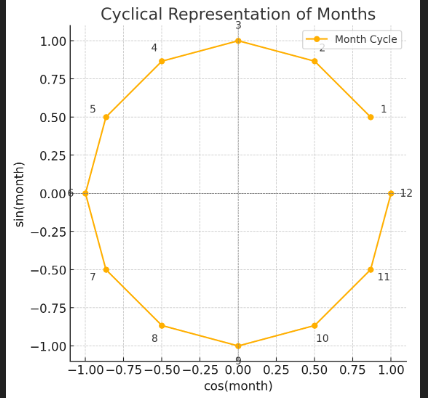

In [54]:
#Add some cyclical features
df["m1"]=np.sin(df["month"]*(2*np.pi/12))
df["m2"]=np.cos(df["month"]*(2*np.pi/12))

In [63]:
df.head(10)

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,date,month,year,weekend,holidays,m1,m2,weekday
0,1,8091,216418,99.0375,111.8625,0,0,20,17,1,2011,0,0,0.5,0.866025,0
1,2,8091,216419,99.0375,99.0375,0,0,28,17,1,2011,0,0,0.5,0.866025,0
2,3,8091,216425,133.9500,133.9500,0,0,19,17,1,2011,0,0,0.5,0.866025,0
3,4,8091,216233,133.9500,133.9500,0,0,44,17,1,2011,0,0,0.5,0.866025,0
4,5,8091,217390,141.0750,141.0750,0,0,52,17,1,2011,0,0,0.5,0.866025,0
5,9,8091,219009,227.2875,227.2875,0,0,18,17,1,2011,0,0,0.5,0.866025,0
6,10,8091,219029,327.0375,327.0375,0,0,47,17,1,2011,0,0,0.5,0.866025,0
7,13,8091,223245,210.9000,210.9000,0,0,50,17,1,2011,0,0,0.5,0.866025,0
8,14,8091,223153,190.2375,234.4125,1,1,82,17,1,2011,0,0,0.5,0.866025,0
9,17,8095,216418,99.0375,99.0375,0,0,99,17,1,2011,0,0,0.5,0.866025,0


In [59]:
def day(year,month,date):
  return datetime(year,month,date).weekday()
df["weekday"]=df.apply(lambda x:day(x["year"],x["month"],x["date"]),axis=1)

In [60]:
df.drop("week",axis=1,inplace=True)

In [61]:
df["store_id"].nunique(),df["sku_id"].nunique()

(76, 28)

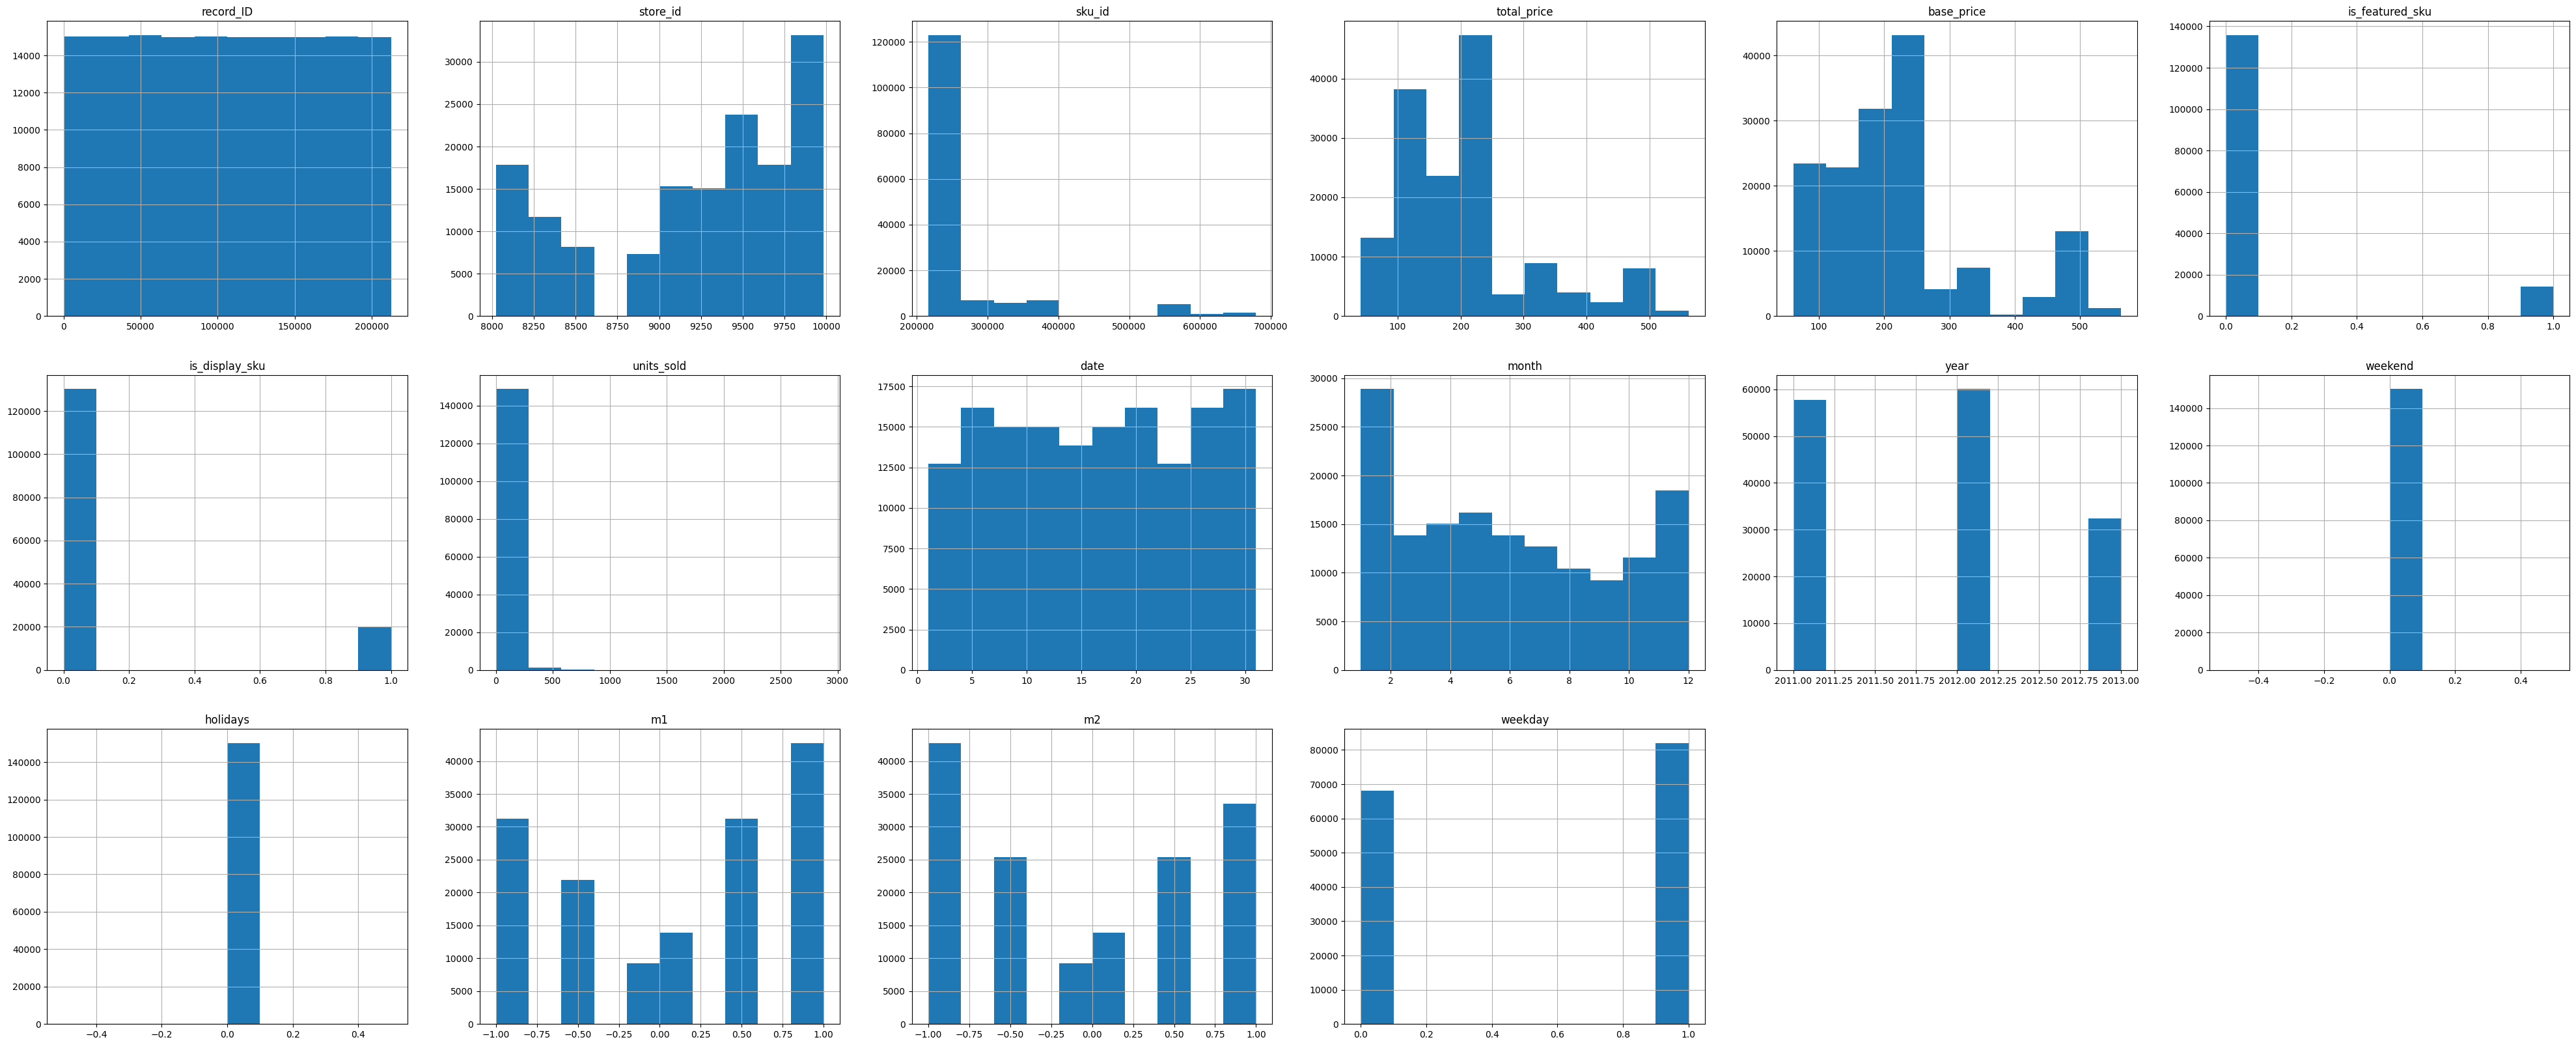

In [72]:
plt.rcParams["figure.figsize"]=(50,20)
c=1
for i in df.columns:
  plt.subplot(3,6,c)
  plt.title(f"{i}")
  df[i].hist()
  c+=1
plt.show()

In [78]:
df.rename(columns={"units_sold":"sales"},inplace=True)

In [79]:
display(df.head())

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,sales,date,month,year,weekend,holidays,m1,m2,weekday
0,1,8091,216418,99.0375,111.8625,0,0,20,17,1,2011,0,0,0.5,0.866025,0
1,2,8091,216419,99.0375,99.0375,0,0,28,17,1,2011,0,0,0.5,0.866025,0
2,3,8091,216425,133.9500,133.9500,0,0,19,17,1,2011,0,0,0.5,0.866025,0
3,4,8091,216233,133.9500,133.9500,0,0,44,17,1,2011,0,0,0.5,0.866025,0
4,5,8091,217390,141.0750,141.0750,0,0,52,17,1,2011,0,0,0.5,0.866025,0


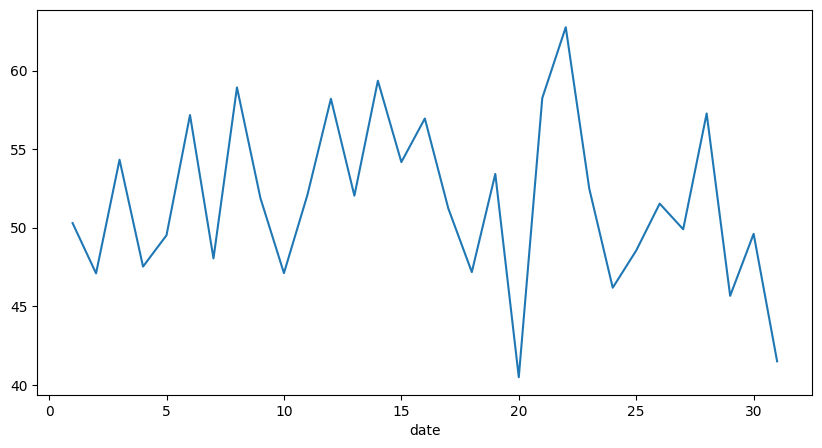

In [80]:
plt.figure(figsize=(10,5))
df.groupby("date").mean()["sales"].plot()
plt.show()

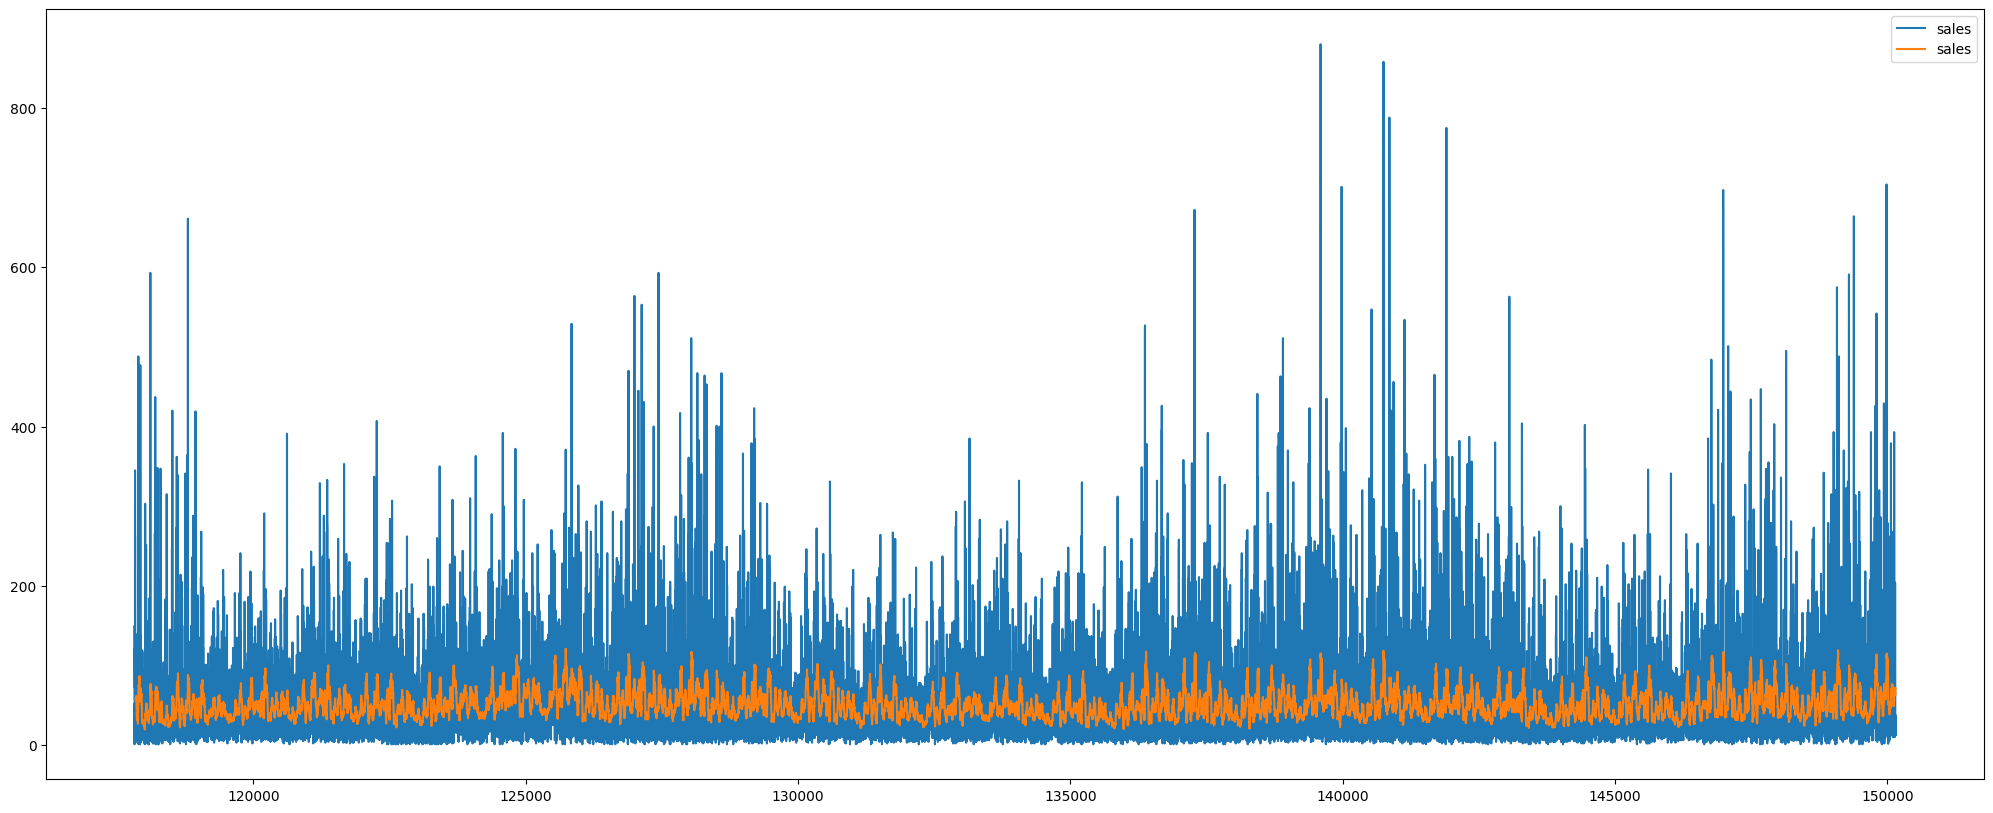

In [86]:
plt.rcParams["figure.figsize"]=(25,10)
window_size=30
data=df[df["year"]==2013]
windows=data["sales"].rolling(window_size)
sma=windows.mean()
sma=sma[window_size-1:]
data["sales"].plot()
sma.plot()
plt.legend()
plt.show()

<ipython-input-92-ef2a586b717c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["sales"])


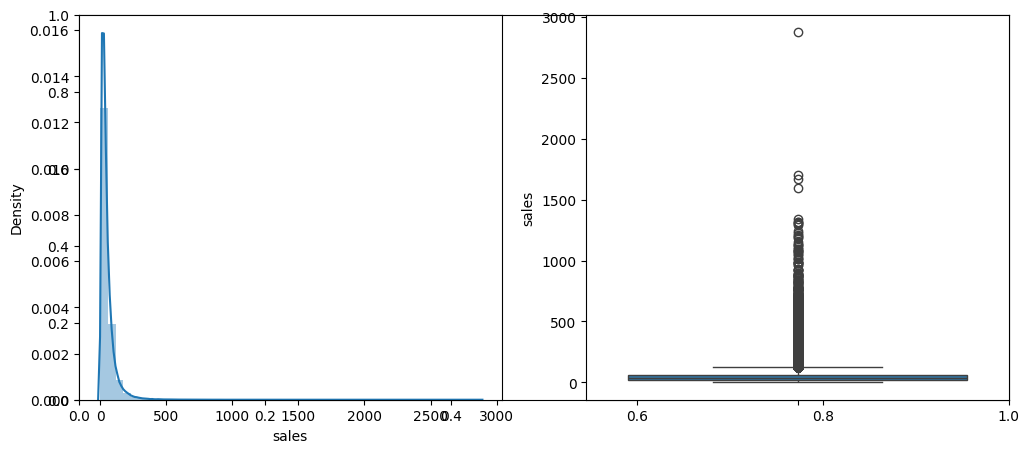

In [92]:
plt.subplots(figsize=(12,5))
plt.subplot(1,2,1)
sb.distplot(df["sales"])
plt.subplot(1,2,2)
sb.boxplot(df["sales"])
plt.show()

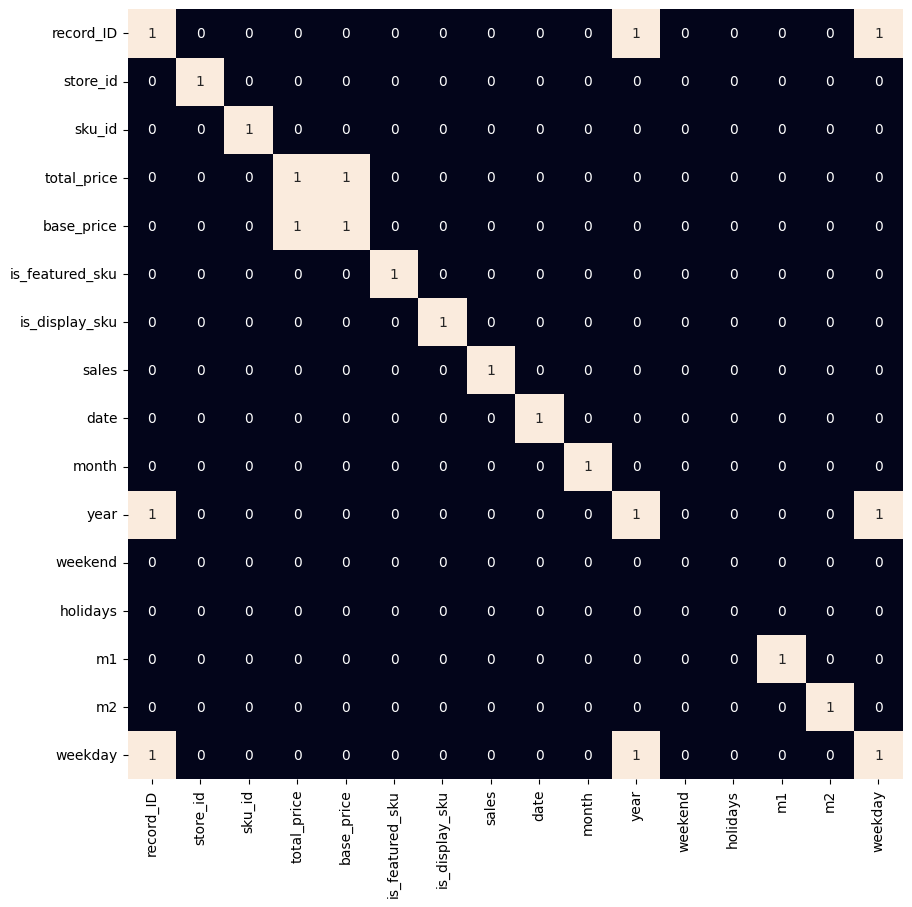

In [93]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr()>0.8,annot=True,cbar=False)
plt.show()

In [99]:
print(df[df["sales"]<140].shape[0])#14K
print(df.shape[0])#15K
df=df[df["sales"]<140]
print(df.shape)

141660
141660
(141660, 16)


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error as mse,r2_score

In [110]:
features=df.drop(["sales","year"],axis=1)
target=df["sales"].values
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=22)
x_train.shape,x_test.shape

((99162, 14), (42498, 14))

In [129]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [130]:
#Impute
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [131]:
#Scale
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


LinearRegression()
Training MSE: 679.511086854414
Validation error:
MAE: 20.049601236796335
MSE: 677.5689728044722
RMSE: 26.03015506685414
R2 Score: 0.2163233172969241


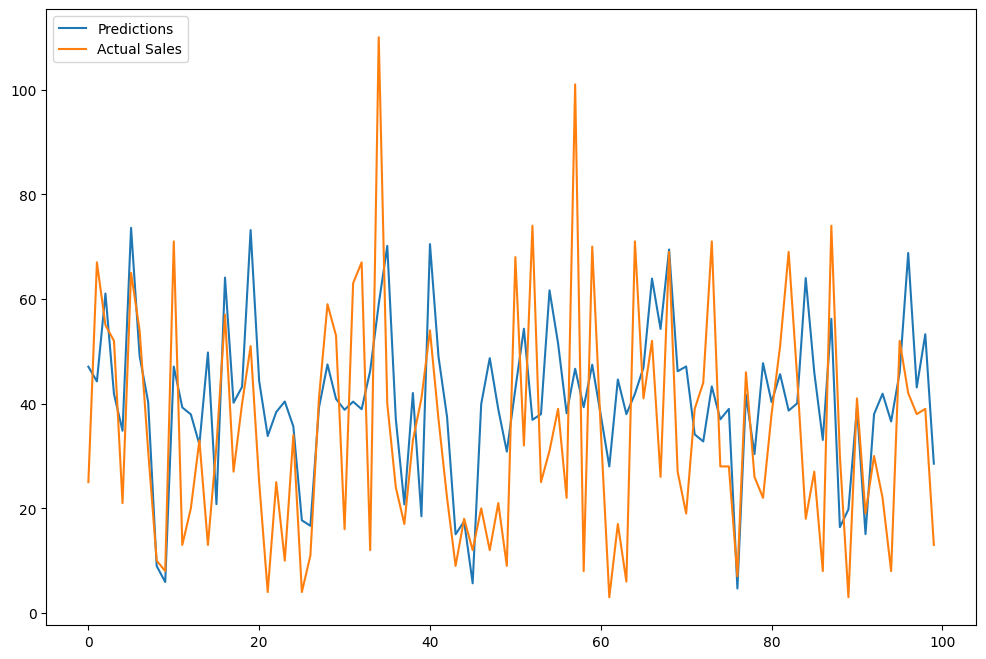


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training MSE: 180.76364135742188
Validation error:
MAE: 10.507342338562012
MSE: 204.37942504882812
RMSE: 14.296133220169295
R2 Score: 0.7636146545410156


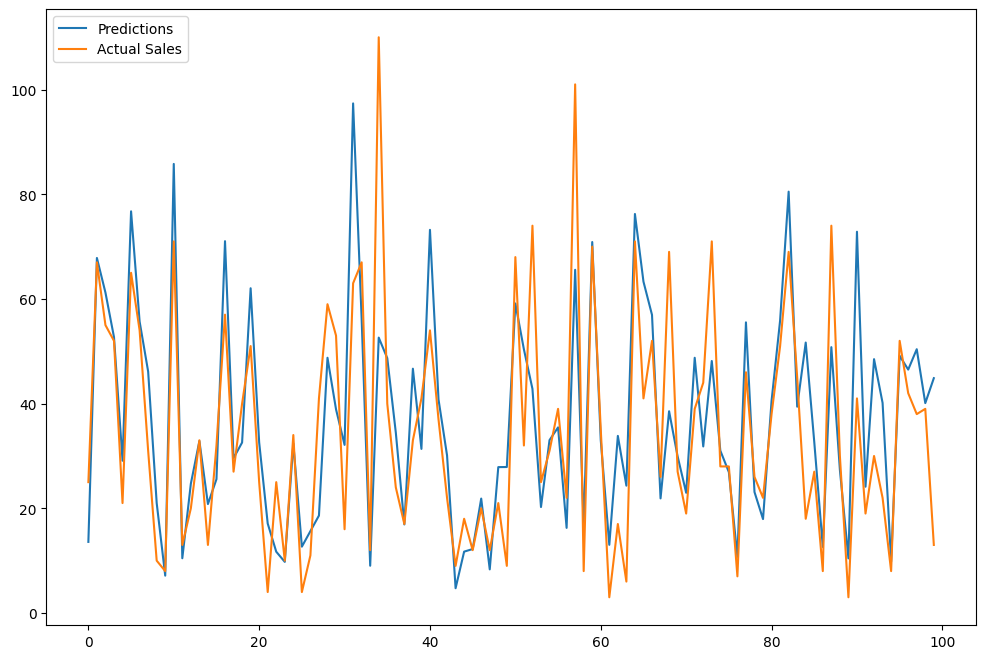


Lasso()
Training MSE: 690.549902667766
Validation error:
MAE: 20.21108285351408
MSE: 687.7425668403638
RMSE: 26.22484636447588
R2 Score: 0.20455653229758197


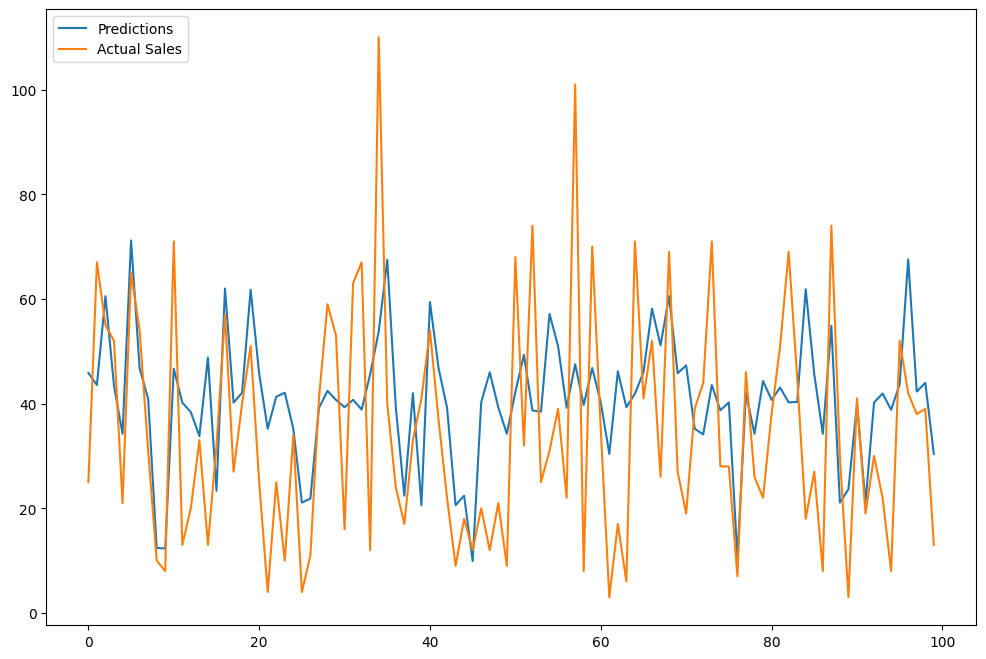


Ridge()
Training MSE: 679.5110888363781
Validation error:
MAE: 20.04960057546946
MSE: 677.5689551356236
RMSE: 26.030154727462218
R2 Score: 0.21632333773272494


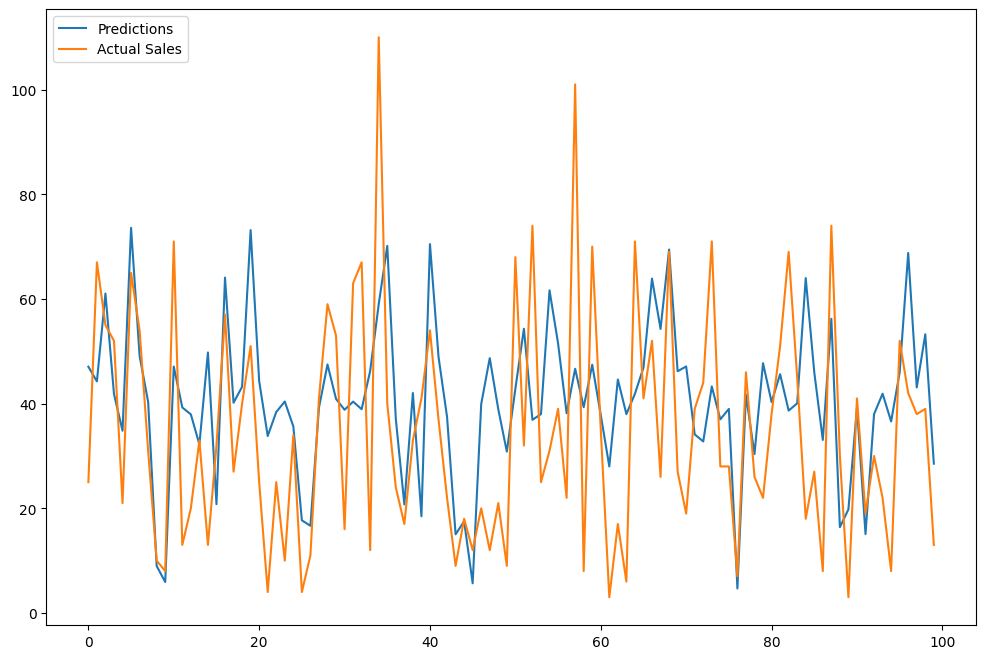

In [139]:
models=[LinearRegression(),XGBRegressor(),Lasso(),Ridge()]
for model in models:
  print()
  print(model)
  model.fit(x_train, y_train)
  train_pred = model.predict(x_train)
  print("Training MSE:", mse(y_train, train_pred))
  test_pred = model.predict(x_test)
  print("Validation error:")
  print("MAE:", mean_absolute_error(y_test, test_pred))
  print("MSE:", mse(y_test, test_pred))
  print("RMSE:", np.sqrt(mse(y_test, test_pred)))
  print("R2 Score:", r2_score(y_test, test_pred))
  plt.rcParams["figure.figsize"] = (12,8)
  plt.plot(test_pred[-100:], label='Predictions')
  plt.plot(y_test[-100:], label='Actual Sales')
  plt.legend(loc="upper left")
  plt.show()